In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import random

# from data.data_accessors import tmprss2_to_pandas
import numpy as np
from rdkit import Chem, DataStructs
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

random.seed(1)

# os.chdir('/Users/JacobUmans/tmprss2/notebooks')

Text(0.5, 0, 'Activity (log scale)')

<Figure size 432x288 with 0 Axes>

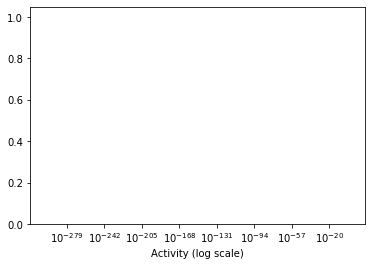

In [5]:
# collect dataset
dataset = pd.read_csv('../dumps/TMPRSS2_processed.csv')



In [6]:
# calculate fingerprints
dataset['fingerprints'] = dataset.smiles.apply(lambda s: Chem.RDKFingerprint(Chem.MolFromSmiles(s)))
# convert fingerprints to arrays
X = np.zeros([len(dataset), 2048])
for i in range(len(dataset)):
    DataStructs.ConvertToNumpyArray(dataset.fingerprints.iloc[i], X[i])

y = np.array(dataset.acvalue)

In [7]:
#create binary dataset to train linear SVM to predict what structures will have activity values below 1 micromolar
y_binary = y

for i in range(y_binary.size):
    if y_binary[i] > 1:
        y_binary[i] = 0
    else:
        y_binary[i] = 1

In [8]:
#split training and testing data for each dataset
train_X_binary, test_X_binary, train_y_binary, test_y_binary = train_test_split(X, y_binary, test_size=0.2)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [9]:
#linear SVM
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(train_X_binary, train_y_binary)

pred = clf.predict(test_X_binary)
counter = 0
arr_size = test_y_binary.size
for i in range(arr_size):
    if(test_y_binary[i] == pred[i]):
        counter = counter + 1

print("SVM Accuracy:{}".format(counter/arr_size))

SVM Accuracy:0.9473684210526315


In [11]:
#SVM regression
svmReg = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-5))
svmReg.fit(train_X, train_y)

pred = svmReg.predict(test_X)
MSE = mean_squared_error(test_y, pred)
RMSE = np.sqrt(MSE)
print("SVR RMSE:{}".format(RMSE))

SVR RMSE:0.4975557324611267
